<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 28, 2018: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, matricial characterization of Hermite interpolating polynomials.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t, alpha

from matrix_functions import *
from sequences import *

init_printing()

In [2]:
d = IndexedBase('d')
g = Function('g')
m_sym = symbols('m')

---

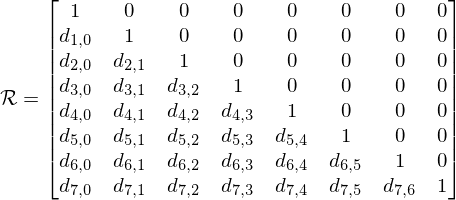

In [3]:
m=8
R = define(Symbol(r'\mathcal{R}'), 
           Matrix(m, m, riordan_matrix_by_recurrence(m, lambda n, k: {(n, k):1 if n == k else d[n, k]})))
R

In [4]:
eigendata = spectrum(R)
eigendata

In [5]:
data, eigenvals, multiplicities = eigendata.rhs

In [6]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

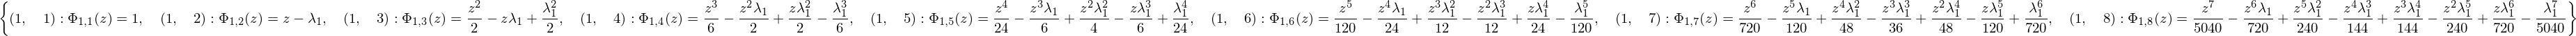

In [7]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=False)
Phi_polynomials

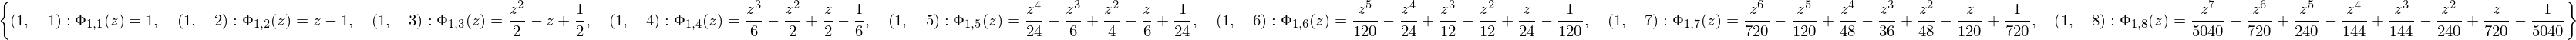

In [8]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

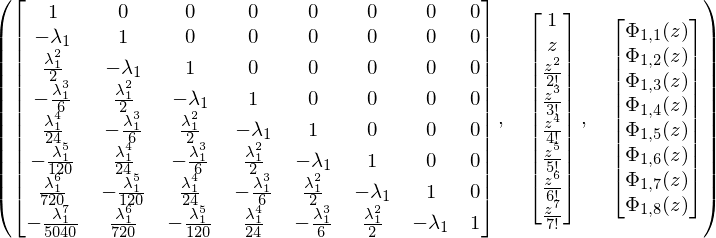

In [9]:
res_expt = M_expt, z_expt, Phi_expt =(
    Matrix(m, m, lambda n,k: (-lamda_indexed[1])**(n-k)/(factorial(n-k)) if n-k >= 0 else 0),
    Matrix([z**i/factorial(i, evaluate=i<2) for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_expt

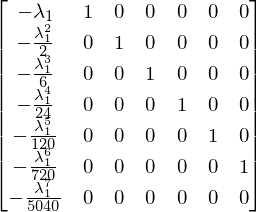

In [10]:
production_matrix(M_expt)

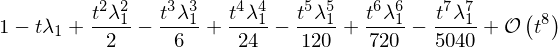

In [11]:
exp(-lamda_indexed[1]*t).series(t, n=m)

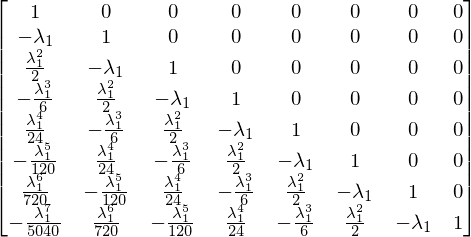

In [12]:
g, f = Function('g'), Function('f')
ERA = Matrix(m, m, riordan_matrix_by_convolution(m, 
                                                 d=Eq(g(t), exp(-lamda_indexed[1]*t)), 
                                                 h=Eq(f(t), t)))
ERA

In [13]:
assert M_expt == ERA

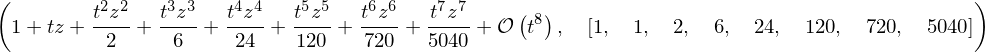

In [14]:
exp(z*t).series(t, n=m), [factorial(i) for i in range(m)]

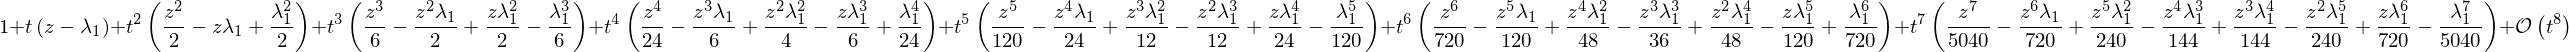

In [15]:
exp(t*(z-lamda_indexed[1])).series(t, n=m)

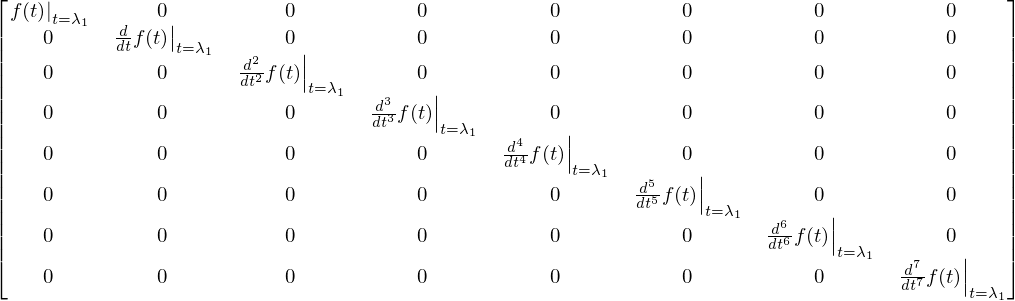

In [16]:
partials = Matrix(m, m, lambda n, k: Subs(f(t).diff(t, n), [t], [lamda_indexed[1]]) if n==k else 0)
partials

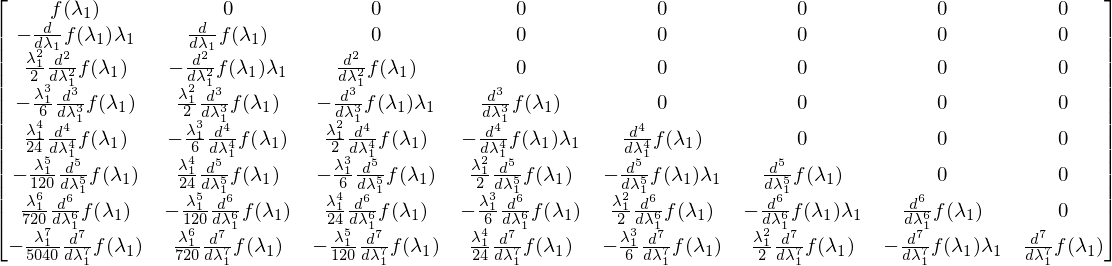

In [17]:
DE = (partials * M_expt).applyfunc(lambda i: i.doit())
DE

In [ ]:
production_matrix(DE).applyfunc(simplify) # takes long to evaluate

## $f(z)=\frac{1}{z}$

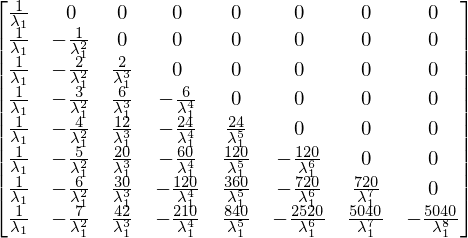

In [18]:
DE_inv = DE.subs({f:Lambda(t, 1/t)}).applyfunc(lambda i: i.doit())
DE_inv

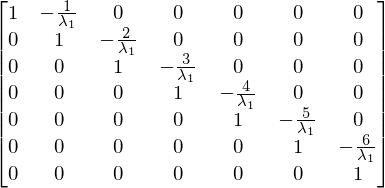

In [19]:
production_matrix(DE_inv)

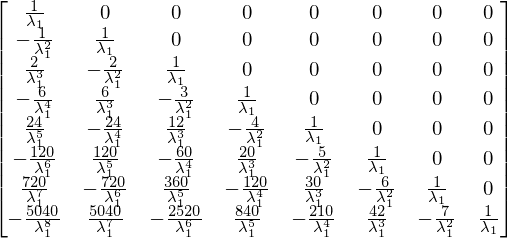

In [22]:
Matrix(m, m, columns_symmetry(DE_inv))

In [23]:
inspect(_)

nature(is_ordinary=False, is_exponential=True)

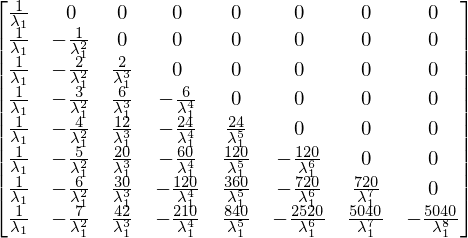

In [24]:
DE_inv_RA = Matrix(m, m, 
       riordan_matrix_by_recurrence(m, 
                                    lambda n, k: {(n-1,k-1):-k/lamda_indexed[1], (n-1,k):1} if k else {(n-1,k):1},
                                    init={(0,0):1/lamda_indexed[1]}))
DE_inv_RA

In [25]:
assert DE_inv == DE_inv_RA

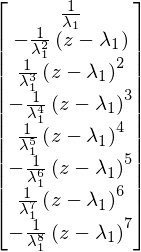

In [26]:
DEz = (DE_inv* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

In [27]:
g_v = ones(1, m) * DEz
g_inv_eq = Eq(g(z), g_v[0,0], evaluate=False)
g_inv_eq.subs(eigenvals)

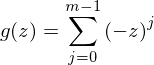

In [28]:
g_Z_12 = Eq(g(z), Sum((-z)**(j), (j,0,m_sym-1)))
g_Z_12

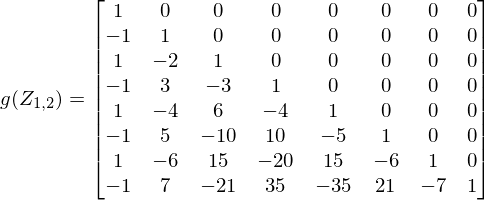

In [31]:
with lift_to_matrix_function(g_Z_12.subs({m_sym:m}).doit()) as g_Z_12_fn:
    P = Matrix(m, m, binomial)
    I = eye(m, m)
    Z_12 = define(Symbol(r'Z_{1,2}'), P - I)
    P_inv = g_Z_12_fn(Z_12)
P_inv

In [34]:
assert P * P_inv.rhs == I

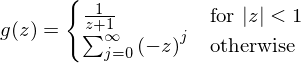

In [35]:
g_Z_12.subs({m_sym:oo}).doit()

## $f(z)=z^{r}$

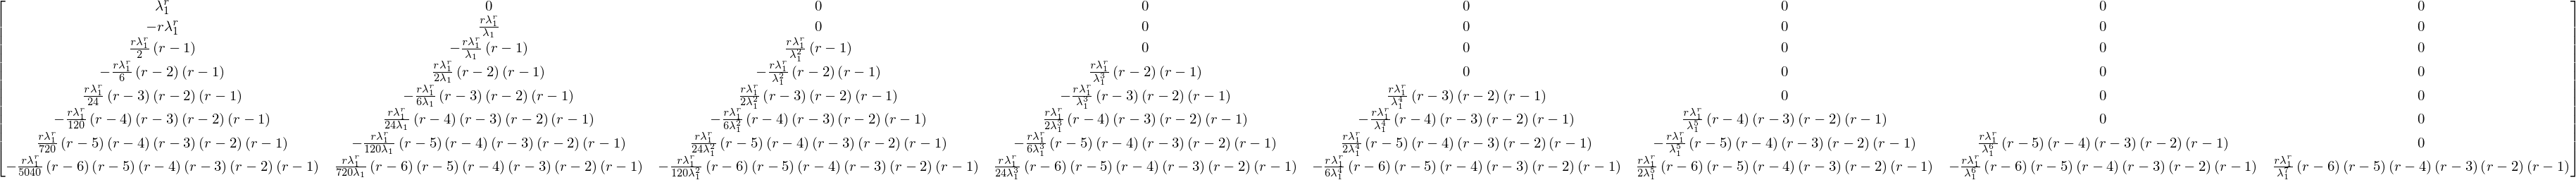

In [36]:
DE_pow = DE.subs({f:Lambda(t, t**r)}).applyfunc(lambda i: i.doit().factor())
DE_pow

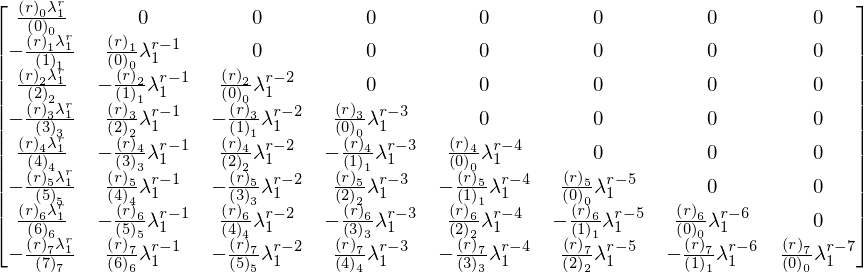

In [37]:
DE_pow_ff = Matrix(m, m, lambda n, k: ((-1)**(n-k)*ff(r, n, evaluate=False)*(lamda_indexed[1])**r/(ff(n-k, n-k, evaluate=False)*lamda_indexed[1]**k) if k<=n else S(0)).powsimp())
DE_pow_ff

In [38]:
assert DE_pow.applyfunc(powsimp) == DE_pow_ff.doit()

In [42]:
ff(r, 7), factorial(7), ff(7,7)

In [43]:
assert binomial(r,7).combsimp() == (ff(r, 7)/ff(7,7))

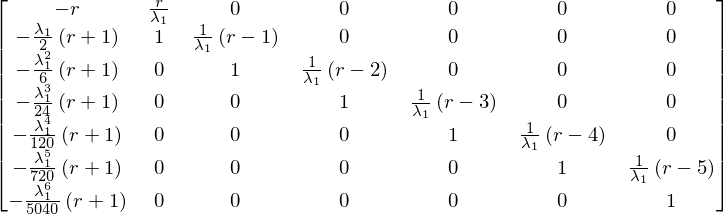

In [44]:
production_matrix(DE_pow)

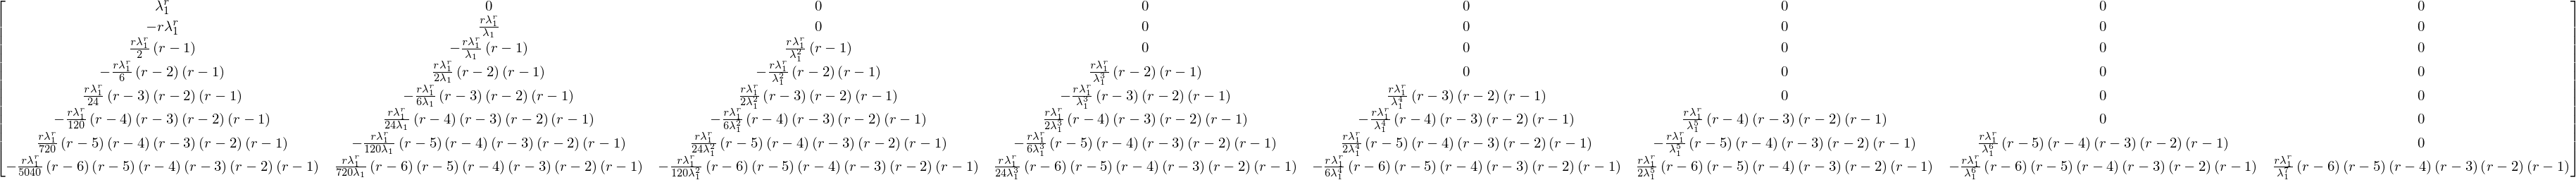

In [45]:
def rec(n, k):
    if k:
        return {(n-1, k-1):( r+1-k)/lamda_indexed[1], (n-1,k):1}
    else:
        return {(n-1, j): -((r+1)*lamda_indexed[1]**j/factorial(j+1) if j else r)  for j in range(n)}
DE_pow_rec = Matrix(m, m, riordan_matrix_by_recurrence(m, rec, init={(0,0):lamda_indexed[1]**r}))
DE_pow_rec = DE_pow_rec.applyfunc(factor)
DE_pow_rec

In [46]:
assert DE_pow == DE_pow_rec

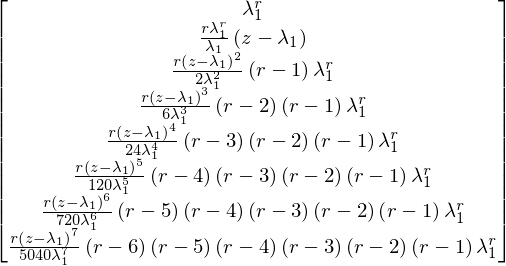

In [47]:
DEz = (DE_pow* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

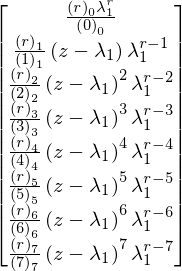

In [48]:
DEz_ff = Matrix(m,1,lambda n,_: (ff(r, n,evaluate=False)/(ff(n,n,evaluate=False)*lamda_indexed[1]**n) * lamda_indexed[1]**r * (z-lamda_indexed[1])**n).powsimp())
DEz_ff

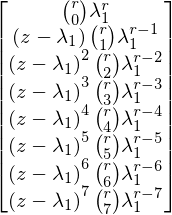

In [49]:
DEz_binomial = Matrix(m,1,lambda n,_: binomial(r, n,evaluate=False)*(lamda_indexed[1]**(r-n))  * (z-lamda_indexed[1])**n)
DEz_binomial

In [50]:
assert DEz.applyfunc(lambda i: i.powsimp()) == DEz_ff.doit().applyfunc(lambda i: i.powsimp()) == DEz_binomial.applyfunc(lambda i: i.combsimp().powsimp())

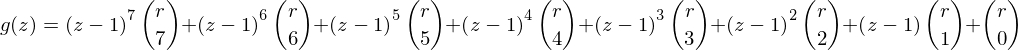

In [51]:
g_v = ones(1, m) * DEz_binomial
g_v_eq = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_v_eq.subs(eigenvals)

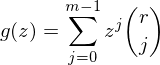

In [52]:
g_pow_eq = Eq(g(z), Sum(z**(j) * binomial(r,j), (j,0,m_sym-1)))
g_pow_eq

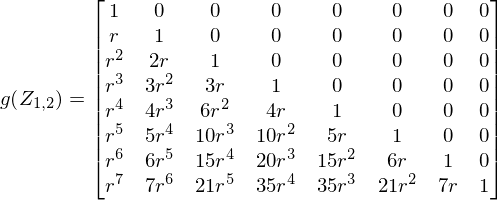

In [54]:
with lift_to_matrix_function(g_pow_eq.subs({m_sym:m}).doit()) as g_pow_fn:
    P_star_r = g_pow_fn(Z_12)

P_star_r

In [57]:
assert (P**r).applyfunc(simplify) == P_star_r.rhs

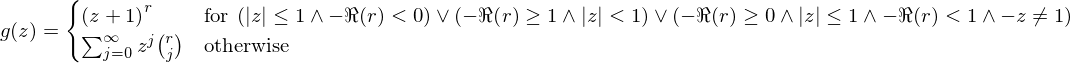

In [58]:
g_pow_eq.subs({m_sym:oo}).doit()

## $f(z)=\sqrt{z}$

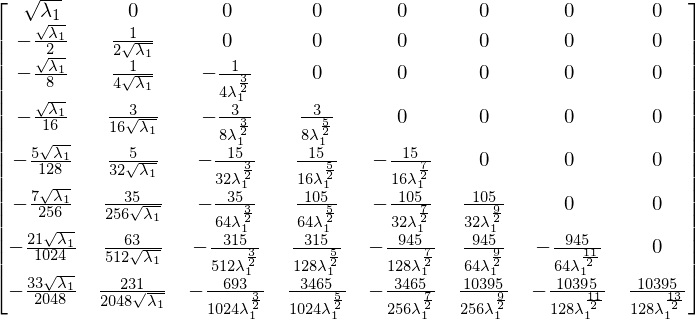

In [59]:
DE_sqrt = DE.subs({f:Lambda(t, sqrt(t))}).applyfunc(lambda i: i.doit().factor())
DE_sqrt

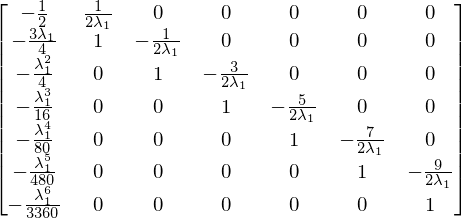

In [60]:
production_matrix(DE_sqrt)

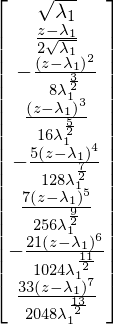

In [61]:
DEz = (DE_sqrt* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

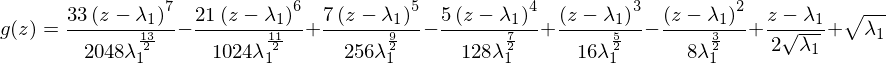

In [62]:
g_v = ones(1, m) * DEz
g_sqrt = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_sqrt

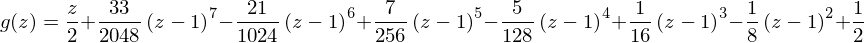

In [63]:
g_sqrt.subs(eigenvals)

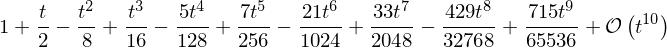

In [64]:
sqrt(1+t).series(t, n=10)

according to [A002596]

[A002596]:https://oeis.org/A002596

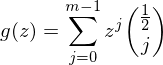

In [65]:
g_sqrt_eq = Eq(g(z), Sum(z**(j) * binomial(1/S(2),j), (j,0,m_sym-1)))
g_sqrt_eq

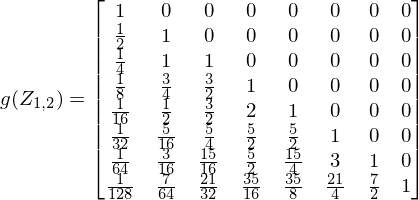

In [67]:
with lift_to_matrix_function(g_sqrt_eq.subs({m_sym:m}).doit()) as g_sqrt_fn:
    P_sqrt_r = g_sqrt_fn(Z_12)

P_sqrt_r

In [68]:
assert (P_sqrt_r.rhs**2).applyfunc(simplify) == P

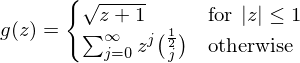

In [69]:
g_sqrt_eq.subs({m_sym:oo}).doit()

## $f(z)=e^{\alpha z}$

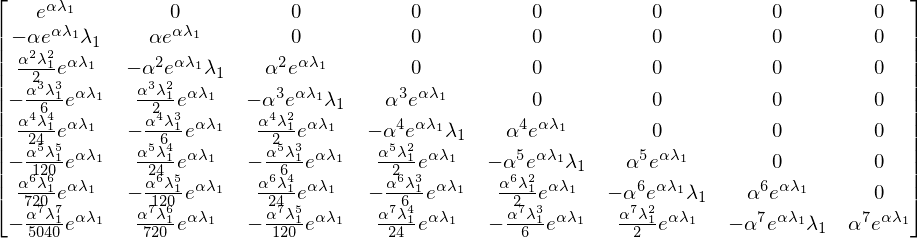

In [70]:
DE_expt = DE.subs({f:Lambda(t, exp(alpha*t))}).applyfunc(lambda i: i.doit().factor())
DE_expt

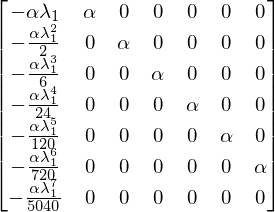

In [71]:
production_matrix(DE_expt)

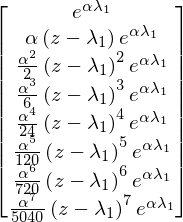

In [72]:
DEz = (DE_expt* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

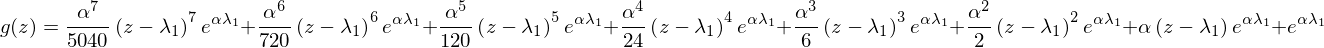

In [73]:
g_v = ones(1, m) * DEz
g_exp_v = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_exp_v

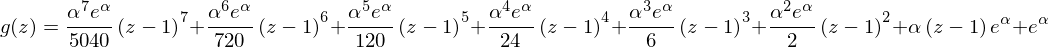

In [74]:
g_exp_v.subs(eigenvals)

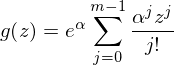

In [75]:
g_exp_eq = Eq(g(z), exp(alpha)*Sum(alpha**j * z**(j) / factorial(j), (j,0,m_sym-1)))
g_exp_eq

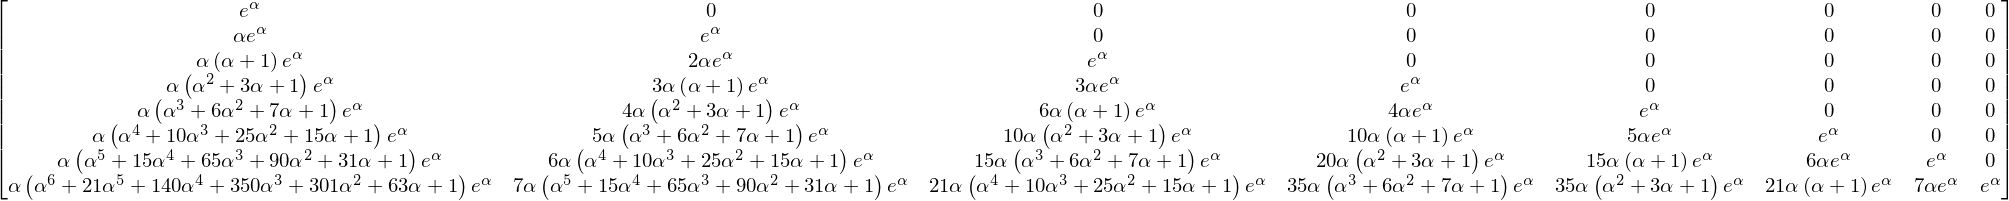

In [78]:
with lift_to_matrix_function(g_exp_eq.subs({m_sym:m}).doit()) as g_exp_fn:
    P_exp_r = g_exp_fn(Z_12)

P_exp_r.rhs.applyfunc(powsimp)

In [82]:
g_exp_eq.subs({m_sym:oo}).doit()#.rhs.powsimp()

## $f(z)=\log{z}$

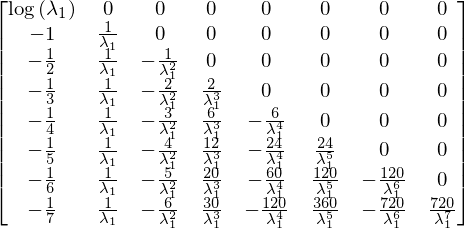

In [83]:
DE_log = DE.subs({f:Lambda(t, log(t))}).applyfunc(lambda i: i.doit().factor())
DE_log

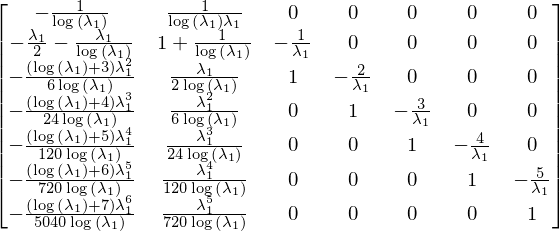

In [84]:
production_matrix(DE_log)

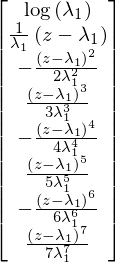

In [85]:
DEz = (DE_log* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

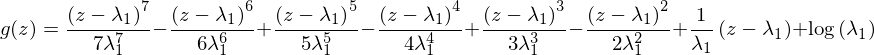

In [86]:
g_v = ones(1, m) * DEz
g_log_v = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_log_v

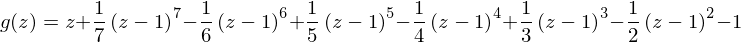

In [87]:
g_log_v.subs(eigenvals)

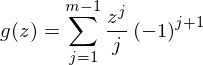

In [88]:
g_log_eq = Eq(g(z), Sum((-1)**(j+1) * z**(j) / j, (j,1,m_sym-1)))
g_log_eq

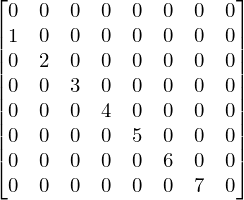

In [91]:
with lift_to_matrix_function(g_log_eq.subs({m_sym:m}).doit()) as g_log_fn:
    P_log_r = g_log_fn(Z_12)

P_log_r.rhs.applyfunc(powsimp)

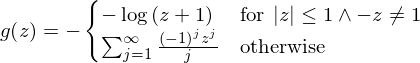

In [92]:
g_log_eq.subs({m_sym:oo}).doit()

## $f(z)=\sin{z}$

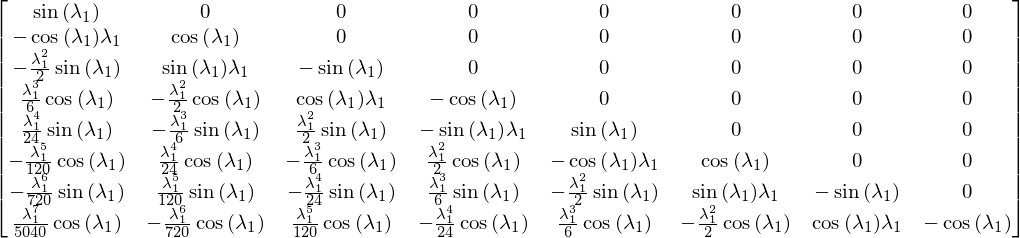

In [93]:
DE_sin = DE.subs({f:Lambda(t, sin(t))}).applyfunc(lambda i: i.doit().factor())
DE_sin

In [ ]:
production_matrix(DE_sin) # takes long to evaluate

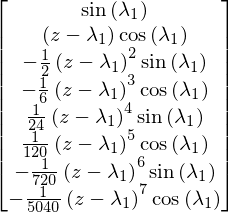

In [95]:
DEz = (DE_sin* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

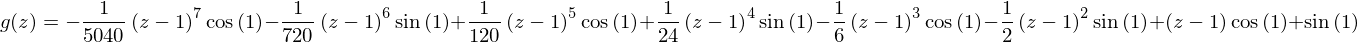

In [96]:
g_v = ones(1, m) * DEz
g_sin = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_sin.subs(eigenvals)

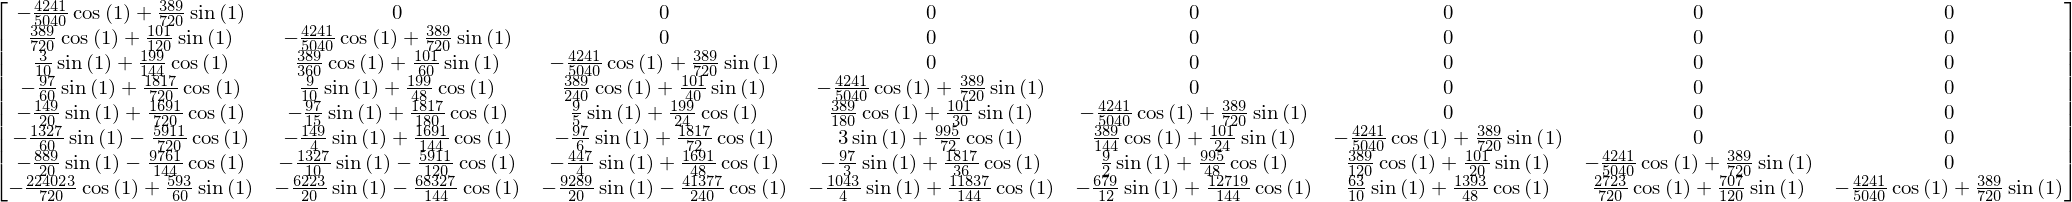

In [100]:
with lift_to_matrix_function(g_sin) as _g_sin:
    P_sin = _g_sin(Z_12).rhs.subs(eigenvals).applyfunc(trigsimp)

P_sin

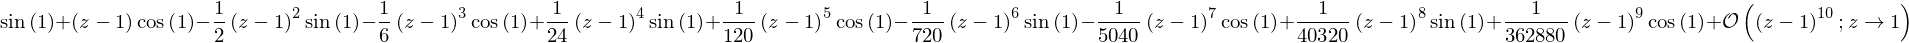

In [101]:
sin(z).series(z, 1,n=10)

## $f(z)=\cos{z}$

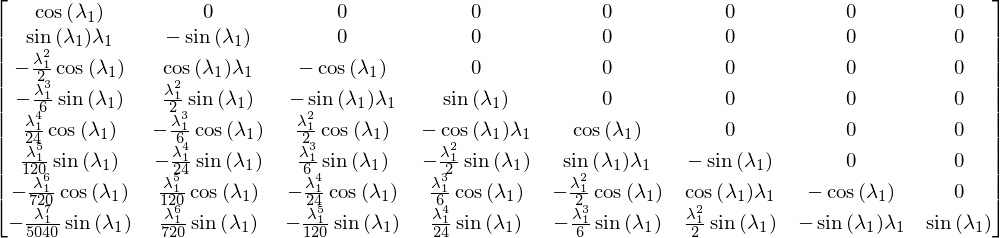

In [102]:
DE_cos = DE.subs({f:Lambda(t, cos(t))}).applyfunc(lambda i: i.doit().factor())
DE_cos

In [ ]:
production_matrix(DE_cos) # takes long to evaluate

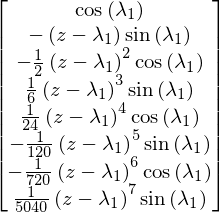

In [104]:
DEz = (DE_cos* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

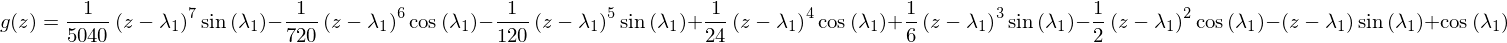

In [105]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)

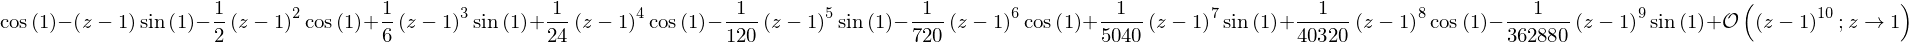

In [106]:
cos(z).series(z, 1,n=10)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.